In [212]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict



def train_svm_and_predict(X, y, test_features):
    """
    train_features: np.array, (num_elements_train x num_features) - train data description, the same features and the same order as in train data
    train_target: np.array, (num_elements_train) - train data target
    test_features: np.array, (num_elements_test x num_features) -- some test data, features are in the same order as train features

    return: np.array, (num_elements_test) - test data predicted target, 1d array
    """
    scr_c=[]
    for i in np.logspace(-1,4,80):
        clf = SVC(C=i, kernel='rbf', class_weight='balanced')    
        scr_c.append((cross_val_score(clf, X, y, cv=5).mean(), i))
        if len(scr_c)>5 and min(scr_c[-5:-1])> scr_c[-1]: break
    model = SVC(C=best_c_rbf, kernel='rbf', class_weight='balanced')
    model.fit(X, y)
            
    
    return model.predict(test_features)


In [213]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [215]:
%%time
accuracy_score(train_svm_and_predict(X, y, X_test_orig),y_test_orig)

Wall time: 2.6 s


0.9

In [47]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict

import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('train_features.csv')
y = pd.read_csv('train_target.csv')
y = np.reshape(np.array(y),(y.shape[0],))
X.head(5)

,0,1,2,3,4
0,-1.765369,-0.915621,-1.006202,-0.108473,0.320745
1,0.483397,-0.490917,-1.660589,-0.259516,-1.188535
2,0.728563,1.441221,-0.829488,0.416509,-1.139912
3,0.017407,-0.856590,0.012511,-0.543946,-0.537570
4,-2.624110,-0.436336,0.757835,0.878373,1.155263


In [3]:
X_test_orig = pd.read_csv('test_features.csv')
y_test_orig = pd.read_csv('test_target.csv')

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12) # 13

In [170]:
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree int, default=3
model = SVC(C=1, kernel='rbf', class_weight='balanced')
model.fit(X,y)
accuracy_score(model.predict(X_train), y_train), accuracy_score(model.predict(X_test), y_test),model.score(X_test_orig,y_test_orig)

(0.8875, 0.9083333333333333, 0.9)

In [171]:
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree int, default=3
model = SVC(C=max(scr)[1], kernel='rbf', class_weight='balanced')
model.fit(X,y)
accuracy_score(model.predict(X_train), y_train), accuracy_score(model.predict(X_test), y_test),model.score(X_test_orig,y_test_orig)

(0.9178571428571428, 0.9291666666666667, 0.9)

In [172]:
%%time
best_C, best_kernel = 0, 0
scr = []
for i in np.logspace(-3,4,60):
    clf = SVC(C=i, kernel='rbf', class_weight='balanced').fit(X_train,y_train)
    scr.append((clf.score(X_test, y_test),i))

Wall time: 2.17 s


In [178]:
max(scr)[1]

4.763938010401341

In [177]:
model = SVC(C=max(scr)[1], kernel='rbf', class_weight='balanced')
model.fit(X,y)
accuracy_score(model.predict(X_train), y_train), accuracy_score(model.predict(X_test), y_test),model.score(X_test_orig,y_test_orig)

(0.9071428571428571, 0.9125, 0.8)

Wall time: 1.8 s


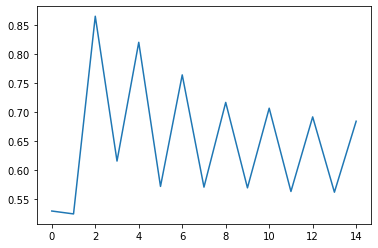

In [163]:
%%time
score=[]
for i in np.arange(0,15):
    clf = SVC(C=1, kernel='poly',degree=i , class_weight='balanced')
    scores = cross_val_score(clf, X,y, cv=5)
    score.append((scores.mean(),i))
plt.plot([i[1] for i in score],[i[0] for i in score])

In [166]:
max(score)

(0.865, 2)

In [167]:
best_degree = max(score)[1]

In [168]:
clf = SVC(C=1, kernel='poly',degree=max(score)[1] , class_weight='balanced')
clf.fit(X_train, y_train)
clf.score(X_train, y_train),clf.score(X_test, y_test),clf.score(X_test_orig, y_test_orig)

(0.8678571428571429, 0.8583333333333333, 0.8)

In [56]:
best_degree

2.7551020408163267

Wall time: 19.8 s


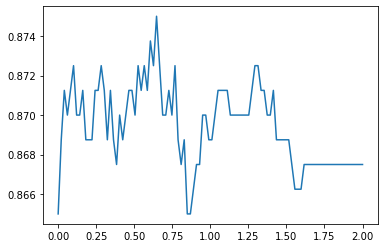

In [32]:
%%time
scores=[]
for i in range(-4,5):
    clf = SVC(C=10**i, kernel='poly',degree=best_degree, class_weight='balanced')
    scores = cross_val_score(clf, X,y, cv=5)
    score.append((scores.mean(),i))
best_i = max(score)[1]
scr =[]
for i in np.linspace(best_i-1,best_i+1,100):
    clf = SVC(C=10**i, kernel='poly',degree=best_degree, class_weight='balanced')
    scores = cross_val_score(clf, X,y, cv=5)
    scr.append((scores.mean(),i))
plt.plot([i[1] for i in scr],[i[0] for i in scr])

In [51]:
best_degree

1

In [65]:
clf = SVC(C=1, kernel='poly',degree=best_degree, class_weight='balanced')
clf.fit(X_train, y_train)
clf.score(X_train, y_train),clf.score(X_test, y_test),clf.score(X_test_orig, y_test_orig)

(0.8678571428571429, 0.8666666666666667, 0.8)

In [58]:
accuracy_score(cross_val_predict(clf, X, y, cv=5),y)

0.865